In [1]:
import os
import h5py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [2]:
def get_predict_results_from_h5(file_path):
    with h5py.File(file_path, 'r') as f:
        try:
            y = f['CLASSIFICATIONS/EVENT/signal'][...]
        except KeyError:
            y = f['SpecialKey.Classifications/EVENT/signal'][...]
    return y

def get_AUC_ACC(y, y_pred):
    AUC = roc_auc_score(y, y_pred)
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    accuracy_scores = []
    # 最多用 1000 個
    if len(thresholds) > 1000:
        thresholds = np.percentile(thresholds, np.linspace(0, 100, 1001))

    for threshold in tqdm(thresholds):
        accuracy_scores.append(accuracy_score(y, y_pred > threshold))

    accuracies = np.array(accuracy_scores)
    ACC = accuracies.max()

    return AUC, ACC

def plot_roc_curve(y_true, y_pred, save_path=None):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))

    AUC, ACC = get_AUC_ACC(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(f'ROC curve of SPANet')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(frameon=False)

    if save_path:
        plt.savefig(save_path, facecolor='White', dpi=300, bbox_inches='tight')
        
    plt.show()

# 0b datasets

In [2]:
h5_dir = '/home/r10222035/SPANet2/data/triHiggs'
file_path = os.path.join(h5_dir, 'triHiggs_0b_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_0b_test-predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:12<00:00, 82.42it/s]


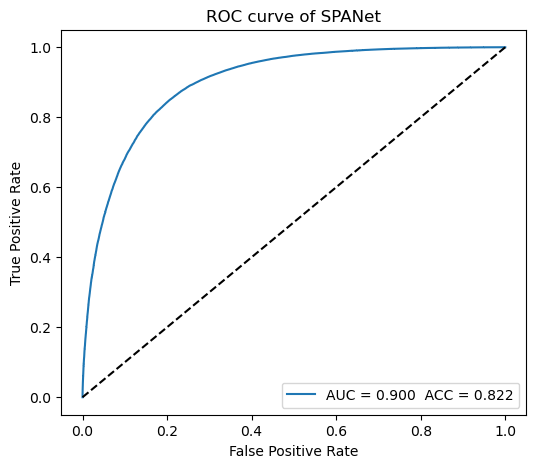

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

i=1

AUC = roc_auc_score(y_test==i,  y_prob[:,i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:,i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0,100,1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test==i,  y_prob[:,i]>threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# 4b datasets

In [4]:
h5_dir = '/home/r10222035/SPANet2/data/triHiggs'
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test-predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:06<00:00, 162.18it/s]


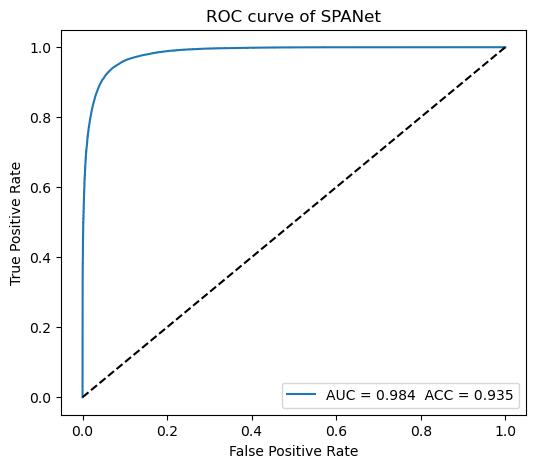

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

i=1

AUC = roc_auc_score(y_test==i,  y_prob[:,i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:,i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0,100,1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test==i,  y_prob[:,i]>threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
h5_dir = '../Sample/SPANet'
file_path = os.path.join(h5_dir, 'triHiggs_6b_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_6b_test-4b_SPANet_cls_predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:03<00:00, 255.51it/s]


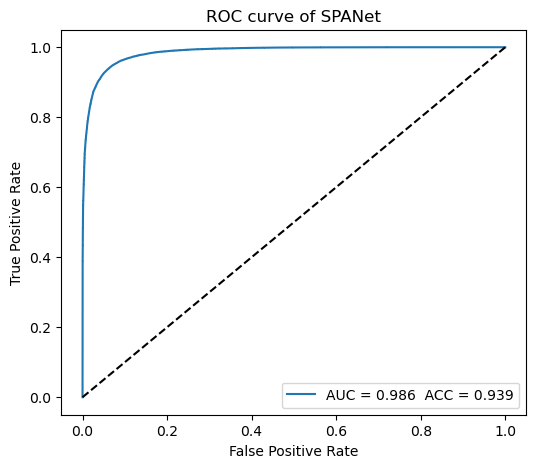

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

i=1

AUC = roc_auc_score(y_test==i,  y_prob[:,i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:,i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0,100,1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test==i,  y_prob[:,i]>threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# 4b datasets: 1M

In [3]:
h5_dir = '../Sample/SPANet'
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_4b-test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_4b-test-4b_SPANet_predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:12<00:00, 79.76it/s]


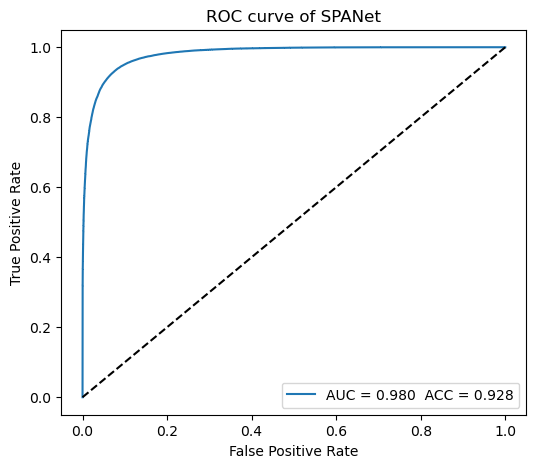

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

i = 1

AUC = roc_auc_score(y_test==i,  y_prob[:, i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:, i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0, 100, 1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test == i,  y_prob[:, i] > threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
h5_dir = '../Sample/SPANet'
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_6b.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_6b-4b_SPANet_predice.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:04<00:00, 205.75it/s]


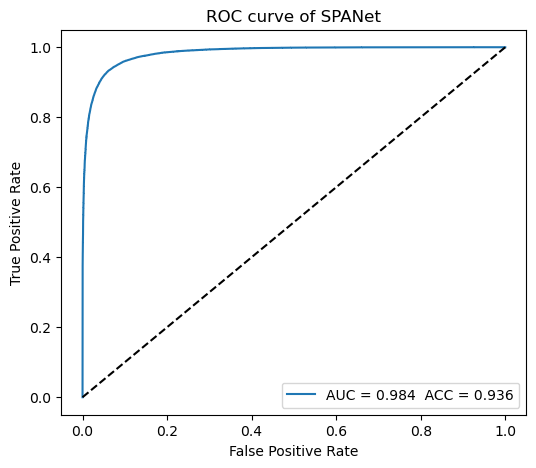

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

i = 1

AUC = roc_auc_score(y_test==i,  y_prob[:, i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:, i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0, 100, 1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test == i,  y_prob[:, i] > threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# 4b datasets: mixed mass 1M

100%|██████████| 1001/1001 [00:11<00:00, 85.68it/s]


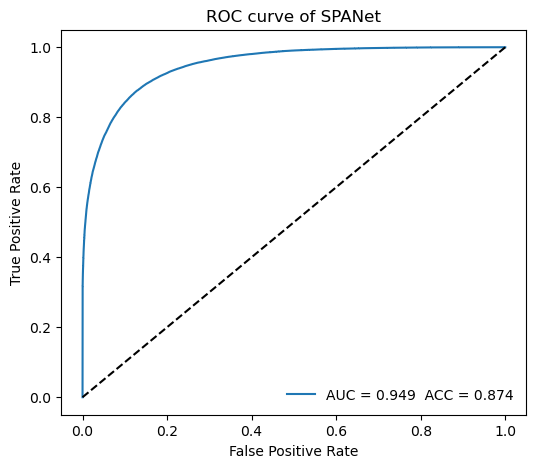

In [3]:
h5_dir = Path('../Sample/SPANet')
file_path = h5_dir / 'triHiggs-4pT40_4b-mix-test.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs-4pT40_4b-mix-test-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

100%|██████████| 1001/1001 [00:04<00:00, 219.57it/s]


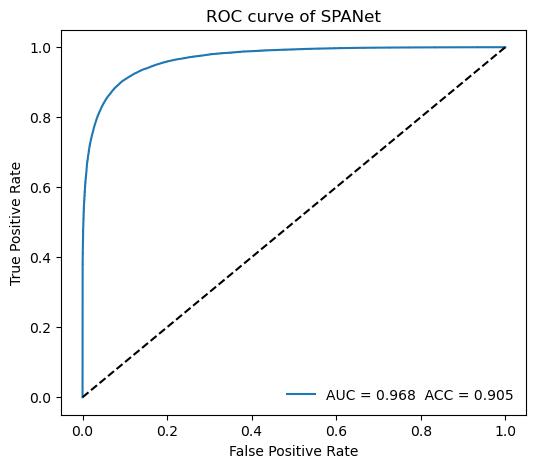

In [4]:
h5_dir = Path('../Sample/SPANet')
file_path = h5_dir / 'triHiggs-4pT40_6b-mix.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs-4pT40_6b-mix-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

## Compute the classification performance at each mass point

In [5]:
h5_dir = Path('../Sample/SPANet')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs-4pT40_4b-mix-test.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs-4pT40_4b-mix-test-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
h5_dir = Path(f'../Sample/SPANet/bkg')
y_test_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_4b-test.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    h5_dir = Path(f'../Sample/SPANet/sig/gghhh_bsm_{m3_m2}')
    y_test_s = get_predict_results_from_h5(h5_dir / 'gghhh-4pT40_4b-test.h5')
    y_prob_s = get_predict_results_from_h5(h5_dir / 'gghhh-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/gghhh_bsm_{m3_m2}/gghhh-4pT40_4b-test-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

100%|██████████| 1001/1001 [00:15<00:00, 65.08it/s]


In [6]:
h5_dir = Path('../Sample/SPANet')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs-4pT40_6b-mix.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs-4pT40_6b-mix-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
h5_dir = Path(f'../Sample/SPANet/bkg')
y_test_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_6b-1.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    h5_dir = Path(f'../Sample/SPANet/sig/gghhh_bsm_{m3_m2}')
    y_test_s = get_predict_results_from_h5(h5_dir / 'gghhh-4pT40_6b-1.h5')
    y_prob_s = get_predict_results_from_h5(h5_dir / 'gghhh-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/gghhh_bsm_{m3_m2}/gghhh-4pT40_6b-1-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

  0%|          | 0/1001 [00:00<?, ?it/s]

100%|██████████| 1001/1001 [00:05<00:00, 192.70it/s]


# TRSM: 4 mass points mixed: 250k 4b datasets

100%|██████████| 1001/1001 [01:25<00:00, 11.69it/s]


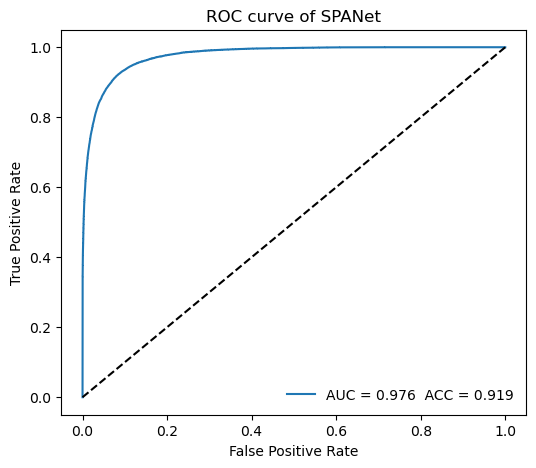

In [8]:
h5_dir = Path('../Sample/SPANet/TRSM')
file_path = h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

100%|██████████| 1001/1001 [00:35<00:00, 28.39it/s]


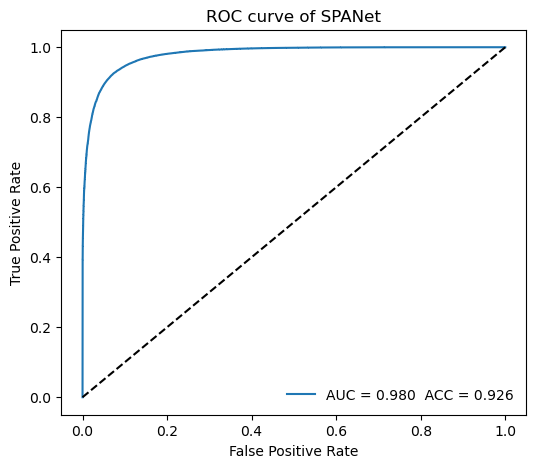

In [9]:
h5_dir = Path('../Sample/SPANet/TRSM')
file_path = h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

## Compute the classification performance at each mass point

In [4]:
h5_dir = Path('../Sample/SPANet/TRSM')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
y_test_b = get_predict_results_from_h5('../Sample/SPANet/bkg/pp6b-4pT40_4b-test.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    sig_dir = h5_dir / f'TRSM_{m3_m2}'
    y_test_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_4b-test.h5')
    y_prob_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/TRSM/TRSM_{m3_m2}/gghhh-4pT40_4b-test-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

100%|██████████| 1001/1001 [00:16<00:00, 61.97it/s]


In [6]:
h5_dir = Path('../Sample/SPANet/TRSM')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
y_test_b = get_predict_results_from_h5('../Sample/SPANet/bkg/pp6b-4pT40_6b-1.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    sig_dir = h5_dir / f'TRSM_{m3_m2}'
    y_test_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_6b-1.h5')
    y_prob_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/TRSM/TRSM_{m3_m2}/gghhh-4pT40_6b-1-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

100%|██████████| 1001/1001 [00:05<00:00, 194.69it/s]


# TRSM: 4 mass points mixed: 750k 4b datasets

100%|██████████| 1001/1001 [00:22<00:00, 44.30it/s]


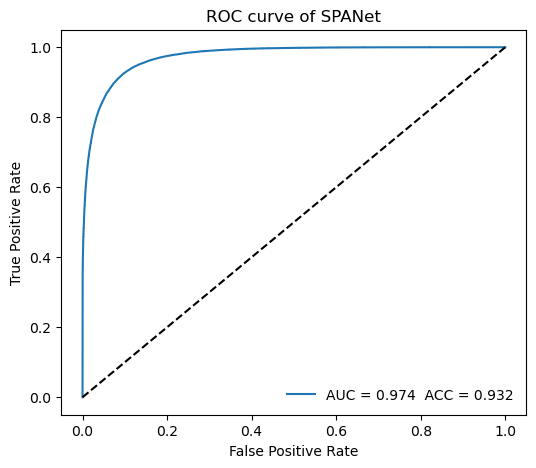

In [3]:
h5_dir = Path('../Sample/SPANet/TRSM')
file_path = h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

100%|██████████| 1001/1001 [00:04<00:00, 208.13it/s]


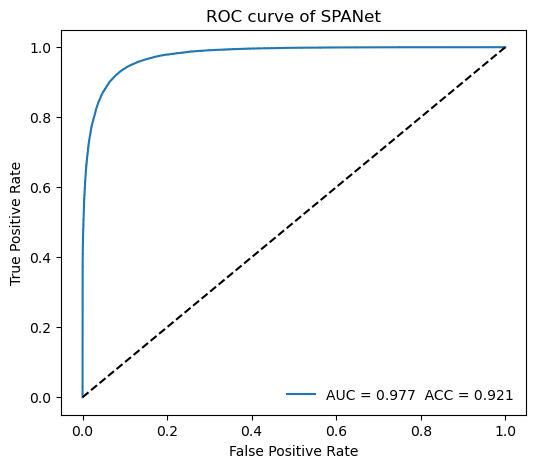

In [4]:
h5_dir = Path('../Sample/SPANet/TRSM')
file_path = h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4.h5'
y_test = get_predict_results_from_h5(file_path)

file_path = h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4-4b_SPANet_predict.h5'
y_prob = get_predict_results_from_h5(file_path)

plot_roc_curve(y_test == 1, y_prob[:, 1])

## Compute the classification performance at each mass point

In [5]:
h5_dir = Path('../Sample/SPANet/TRSM')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_4b-mix_4-test-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
y_test_b = get_predict_results_from_h5('../Sample/SPANet/bkg/pp6b-4pT40_4b-test.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    sig_dir = h5_dir / f'TRSM_{m3_m2}'
    y_test_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_4b-test.h5')
    y_prob_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_4b-test-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/TRSM/TRSM_{m3_m2}/gghhh-4pT40_4b-test-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

100%|██████████| 1001/1001 [00:27<00:00, 36.31it/s]


In [6]:
h5_dir = Path('../Sample/SPANet/TRSM')
y_test = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4.h5')
y_prob = get_predict_results_from_h5(h5_dir / 'triHiggs_TRSM-4pT40_6b-mix_4-4b_SPANet_predict.h5')[:, 1]

# compute the overall ACC and AUC
AUC, ACC = get_AUC_ACC(y_test, y_prob)

# compute the AUC for each signal mass point
y_test_b = get_predict_results_from_h5('../Sample/SPANet/bkg/pp6b-4pT40_6b-1.h5')
y_prob_b = get_predict_results_from_h5(h5_dir / 'pp6b-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

for m3_m2 in ['420_280', '500_275', '500_300', '520_325']:

    sig_dir = h5_dir / f'TRSM_{m3_m2}'
    y_test_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_6b-1.h5')
    y_prob_s = get_predict_results_from_h5(sig_dir / 'gghhh-4pT40_6b-1-4b_SPANet_predict.h5')[:, 1]

    y_test = np.concatenate([y_test_s, y_test_b])
    y_prob = np.concatenate([y_prob_s, y_prob_b])

    auc = roc_auc_score(y_test, y_prob)

    # save the AUC in pandas DataFrame
    data_dict = {'AUC': [auc],
                 'Overall ACC': [ACC],
                 'Overall AUC': [AUC],
                 }
    df = pd.DataFrame(data_dict)
    csv_path = Path(f'../classification_performance/TRSM/TRSM_{m3_m2}/gghhh-4pT40_6b-1-SPANet_classifier.csv')
    csv_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_path, index=False)

100%|██████████| 1001/1001 [00:05<00:00, 184.29it/s]
